In [5]:
library(dplyr)
library(scatterplot3d)
library(cluster)

In [6]:
setwd("D:/Lancaster University/Modules/Statistical learning/coursework task-20180209") 
patient <- read.table("patient.dat", header = TRUE)
#View(patient)
dim(patient)#381  25
names(patient)


[1] 380  25

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"  "GENDER"   "AGE"     
[25] "LIVEWITH"

In [7]:
#Read the dataset
patient_clus<- select(patient, WORK2, HOBBY2, BREATH2, PAIN2, REST2, SLEEP2, APPET2, NAUSEA2, VOMIT2, CONST2, DIARR2, TIRED2, PAINADL2, CONCEN2, TENSE2, WORRY2, IRRIT2, DEPRES2, REMEM2, FAMILY2, SOCIAL2, FINANC2)
names(patient_clus)
patient_clus<- na.omit(patient_clus)
dim(patient_clus)#302 22  
head(patient_clus)

[1] "WORK2"    "HOBBY2"   "BREATH2"  "PAIN2"    "REST2"    "SLEEP2"  
 [7] "APPET2"   "NAUSEA2"  "VOMIT2"   "CONST2"   "DIARR2"   "TIRED2"  
[13] "PAINADL2" "CONCEN2"  "TENSE2"   "WORRY2"   "IRRIT2"   "DEPRES2" 
[19] "REMEM2"   "FAMILY2"  "SOCIAL2"  "FINANC2"

[1] 302  22

WORK2,HOBBY2,BREATH2,PAIN2,REST2,SLEEP2,APPET2,NAUSEA2,VOMIT2,CONST2,...,PAINADL2,CONCEN2,TENSE2,WORRY2,IRRIT2,DEPRES2,REMEM2,FAMILY2,SOCIAL2,FINANC2
3,3,2,3,3,2,1,1,1,1,...,2,3,1,1,2,1,1,3,2,3
4,4,4,4,4,4,1,2,2,2,...,3,3,3,3,3,3,3,2,3,3
4,4,4,2,4,2,1,1,1,1,...,2,3,2,2,2,2,3,3,4,1
4,3,3,3,3,4,2,1,1,1,...,4,4,4,4,4,4,4,3,3,2
3,3,1,3,3,4,2,2,1,1,...,2,3,3,2,3,3,3,3,3,1
2,2,2,2,3,1,2,1,1,3,...,1,1,1,2,1,2,2,3,2,1


In [8]:
#We now try kmeans. We first fit the best of 200 replications, trying 4 clusters 
#We then plot the total within sums of squars against k - an elbow plot.

In [9]:
outwss = numeric(200)
outkmlist=array(list(NULL), 200)
for (i in 1:200)
{                                    # kmeans 200 times with
outkm = kmeans(patient_clus, 4, nstart=200, iter.max=200) # different starting values     
outkmlist[[i]]=outkm                 # store the kmeans object
outwss[i]=outkm$tot.withinss        # and the within ss 
}


In [177]:
j=which.min(outwss) # what is the index of the minimum wss
            # and the result of the fit
j#3

[1] 1

In [178]:
outwss[j]   # print out the wss value - minimum total within sums of squares 
 

[1] 4140.472

In [179]:
outkmlist[[j]]

K-means clustering with 2 clusters of sizes 195, 107

Cluster means:
     WORK2   HOBBY2  BREATH2    PAIN2    REST2   SLEEP2   APPET2 NAUSEA2
1 2.092308 1.969231 1.435897 1.558974 2.061538 1.717949 1.323077 1.20000
2 3.570093 3.429907 2.345794 2.822430 3.429907 2.897196 2.308411 2.17757
    VOMIT2   CONST2   DIARR2   TIRED2 PAINADL2  CONCEN2   TENSE2   WORRY2
1 1.041026 1.323077 1.220513 2.158974 1.297436 1.384615 1.620513 1.964103
2 1.579439 2.065421 1.448598 3.485981 2.719626 2.457944 2.700935 2.878505
    IRRIT2  DEPRES2   REMEM2  FAMILY2  SOCIAL2  FINANC2
1 1.466667 1.476923 1.461538 1.482051 1.810256 1.312821
2 2.429907 2.485981 2.056075 3.037383 3.411215 2.009346

Clustering vector:
  1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18  20  21  22 
  1   2   2   2   2   1   1   1   1   2   1   1   1   1   1   1   2   1   2   1 
 23  24  25  26  27  30  31  32  34  37  38  39  40  41  42  44  45  47  48  49 
  1   1   1   1   1   2   1   2   1   1   2   1   1   1   1

In [181]:
k.max=10

wss <- sapply(1:k.max, 
              function(k){
kmeans(patient_clus, k, nstart=200,iter.max = 20 )$tot.withinss
                  
})
wss

[1] 6042.507 4140.472 3648.146 3445.711 3278.934 3163.700 3066.506 2972.760
 [9] 2898.274 2835.078

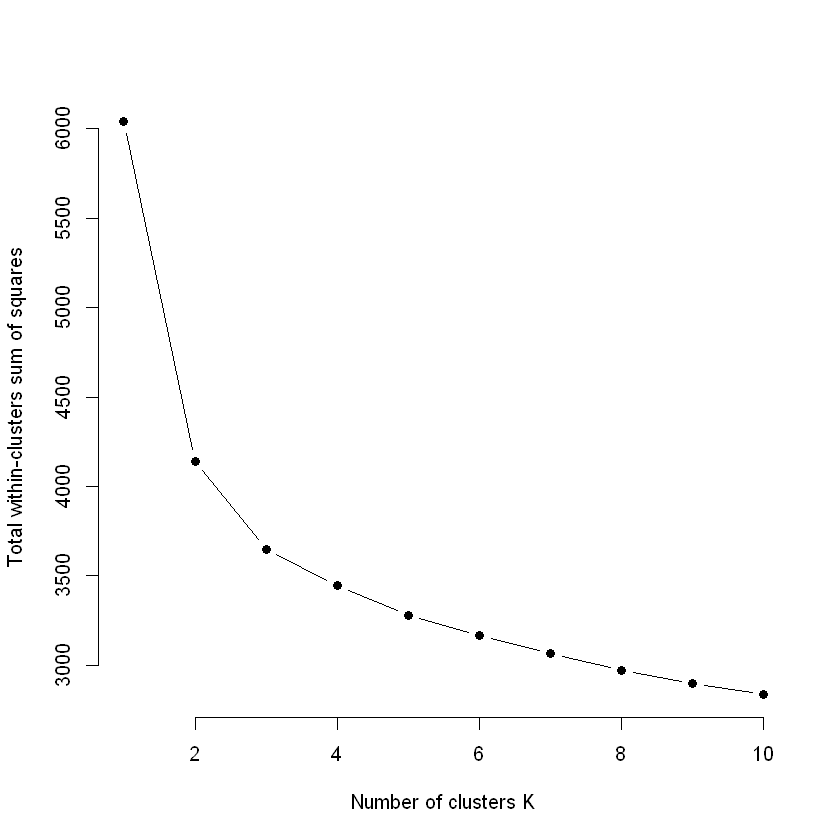

In [182]:
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [183]:
#The plot looks very smooth, with no sudden changes of direction (elbow). It is hard to judge how many clusters 
#from this plot. We try the NbClust function

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


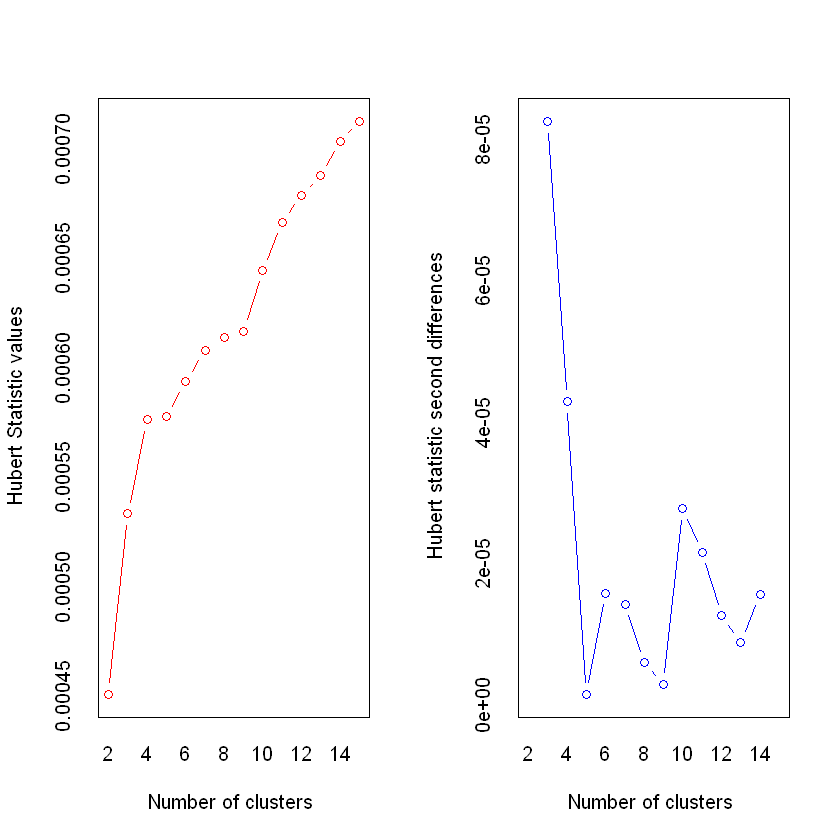

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 12 proposed 2 as the best number of clusters 
* 9 proposed 3 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


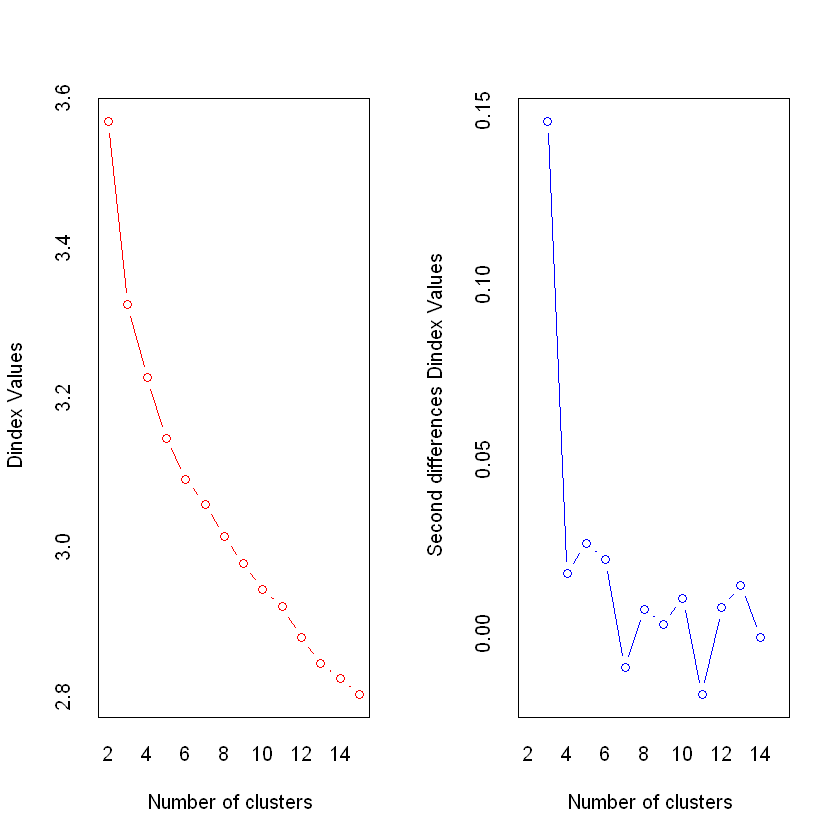

In [184]:
library(NbClust)
nb <- NbClust(patient_clus, diss=NULL, distance = "euclidean", 
              min.nc=2, max.nc=15, method = "kmeans", 
              index = "all", alphaBeale = 0.1)

#### 4 and 6
#Again, the various measures are contradictory. The two graphical procedures suggest either k=4 or k=8, 
#but these are not supported by other measures, which seem to support k=2. We look at the k=4 solution, 
#but we need to consider k=2.

In [ ]:
k4$centers

In [ ]:
k4=kmeans(shyb, 4, nstart=200,iter.max = 20 )
pairs(shyb, col=k4$cluster)

In [ ]:
library(mclust)

In [ ]:
mc=Mclust(shyb)
mc

In [ ]:
plot(mc, what="BIC")

In [ ]:
plot(mc, what="classification")

In [ ]:
plot(mc, what="density")

In [ ]:
hyb$carclass

In [ ]:
mc$classification

In [ ]:
table(mc$classification, hyb$carclass)